In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

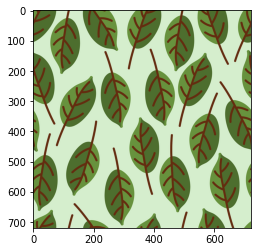

In [2]:
image = cv2.imread("Images\Colourful.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

Reshaping the image from (M,N,3) to (M*N,3) for clustering

In [3]:
[m,n] = image.shape[0:-1]
print(m,n)

720 720


In [4]:
image = image.reshape(m*n,3)
image.shape

(518400, 3)

Using elbow point method to get the optimum number of clusters

In [5]:
dist = []
for i in range(1,15):
  kmean = KMeans(i)
  kmean.fit(image)
  dist.append(kmean.inertia_)
dist

[8214677979.620906,
 543092476.9411068,
 163580706.70240062,
 53764547.19559633,
 35078701.304836616,
 27685140.425837044,
 23133740.59744948,
 19432531.393484943,
 16634130.74643984,
 14093874.661010839,
 12262211.949196156,
 10848268.547218945,
 9899884.903338362,
 8869895.971804932]

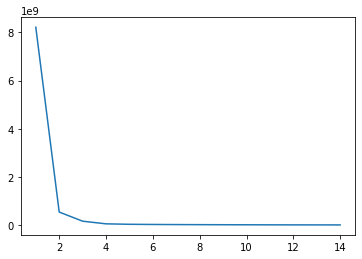

In [6]:
plt.plot(np.arange(1,15),dist)

Performing KMeans Clustering<br>
We take the value from x axis where the deviation in the curve is minimal

In [7]:
kmean = KMeans(4)
kmean.fit(image)

KMeans(n_clusters=4)

In [8]:
centers = kmean.cluster_centers_ 
centers

array([[ 99.68353614,  43.78673396,  15.28036663],
       [213.12367141, 238.08724477, 205.16287723],
       [104.4119387 , 147.08072007,  63.07695911],
       [ 77.24240263, 109.7257729 ,  45.33233139]])

In [9]:
labels = kmean.labels_
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [10]:
per = []
for i in range(0,len(centers)):
  j = list(labels).count(i)
  j = j/len(labels)
  per.append(j)
per

[0.12270833333333334,
 0.5059934413580247,
 0.14405864197530865,
 0.22723958333333333]

([<matplotlib.patches.Wedge at 0x7f99b824b9d0>,
 [Text(1.0192717542052723, 0.413624335695214, ''),
  Text(-0.7812555083873779, 0.7743641460026284, ''),
  Text(-0.3351095422810885, -1.0477125534573686, ''),
  Text(0.8313994756737966, -0.7202603083950527, '')])

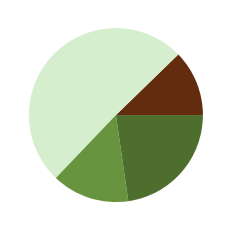

In [11]:
plt.pie(per,colors=np.array(centers/255))